### Libaries loading

In [1]:
!pip install matplotlib

  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp39-cp39-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp39-cp39-win_amd64.whl (2.2 MB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)


In [3]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl (11.6 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)


In [4]:
!pip install numpy

In [5]:
!pip install pandas

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import torch

### Hyperparameter initializing

In [7]:
RANDOM_STATE = 42
LEARNING_RATE = 0.0001
EPOCHS = 100
BATCH_SIZE = 32
NUM_CLASSES = 7

In [8]:
# manual seed
torch.manual_seed(RANDOM_STATE)

Check if there're any `GPU` appear

In [9]:
!nvidia-smi

Fri Mar  7 15:04:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.70                 Driver Version: 572.70         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   44C    P8              2W /   90W |     133MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


## Data Exploring

In [11]:
train_path = 'C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/train'
test_path = 'C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test'

In [18]:
!pip install opencv-python


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


In [19]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

# Paths to dataset folders
train_path = r"C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/train"
test_path = r"C:/College/Semester 5/Computer Vision/Project/Mini Project/archive/test"

# Function to load images from a folder
def load_images_from_folder(folder_path):
    images = []
    labels = []  # Store labels if subfolders exist (e.g., 'happy', 'sad')
    
    for label in sorted(os.listdir(folder_path)):  # If categories are stored in subfolders
        label_path = os.path.join(folder_path, label)
        
        if os.path.isdir(label_path):  # Ensure it's a category folder
            for file in sorted(os.listdir(label_path)):
                if file.endswith(".jpg") or file.endswith(".png"):
                    img = cv2.imread(os.path.join(label_path, file), cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (48, 48))  # Resize to 48x48
                    images.append(img)
                    labels.append(label)  # Store the label

    return np.array(images), np.array(labels)

# Load training and testing datasets
X_train, y_train = load_images_from_folder(train_path)
X_test, y_test = load_images_from_folder(test_path)

# Split validation set from training set (e.g., 80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Store data in a dictionary
data = {
    "train": (X_train, y_train),
    "val": (X_val, y_val),
    "test": (X_test, y_test)
}

# Save as .npy file
np.save("fer13_imagedataset.npy", data)

print("File fer13_images.npy saved successfully!")


File fer13_images.npy saved successfully!


In [16]:
!pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl (11.2 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [20]:
import torch
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load data
data_path = "fer13_imagedataset.npy"
data = np.load(data_path, allow_pickle=True).item()

X_train, y_train = data['train']
X_val, y_val = data['val']
X_test, y_test = data['test']

In [21]:
# Convert string labels to integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Convert labels to integers
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

print("Data successfully converted to tensors!")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Data successfully converted to tensors!
X_train: torch.Size([22967, 48, 48]), y_train: torch.Size([22967])
X_val: torch.Size([5742, 48, 48]), y_val: torch.Size([5742])
X_test: torch.Size([7178, 48, 48]), y_test: torch.Size([7178])


In [22]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

(torch.Size([22967, 48, 48]),
 torch.Size([22967]),
 torch.Size([5742, 48, 48]),
 torch.Size([5742]),
 torch.Size([7178, 48, 48]),
 torch.Size([7178]))

In [23]:
# convert to type torch float32
X_train = X_train.type(torch.float32)
X_val = X_val.type(torch.float32)
X_test = X_test.type(torch.float32)

y_train = y_train.type(torch.long)
y_val = y_val.type(torch.long)
y_test = y_test.type(torch.long)

In [24]:
# convert to pytorch format (N, C, H, W)
X_train = X_train.unsqueeze(1)
X_val = X_val.unsqueeze(1)
X_test = X_test.unsqueeze(1)

X_train.shape, X_val.shape, X_test.shape

(torch.Size([22967, 1, 48, 48]),
 torch.Size([5742, 1, 48, 48]),
 torch.Size([7178, 1, 48, 48]))

In [25]:
# show unique value of y_train
y_train.unique()

tensor([0, 1, 2, 3, 4, 5, 6])

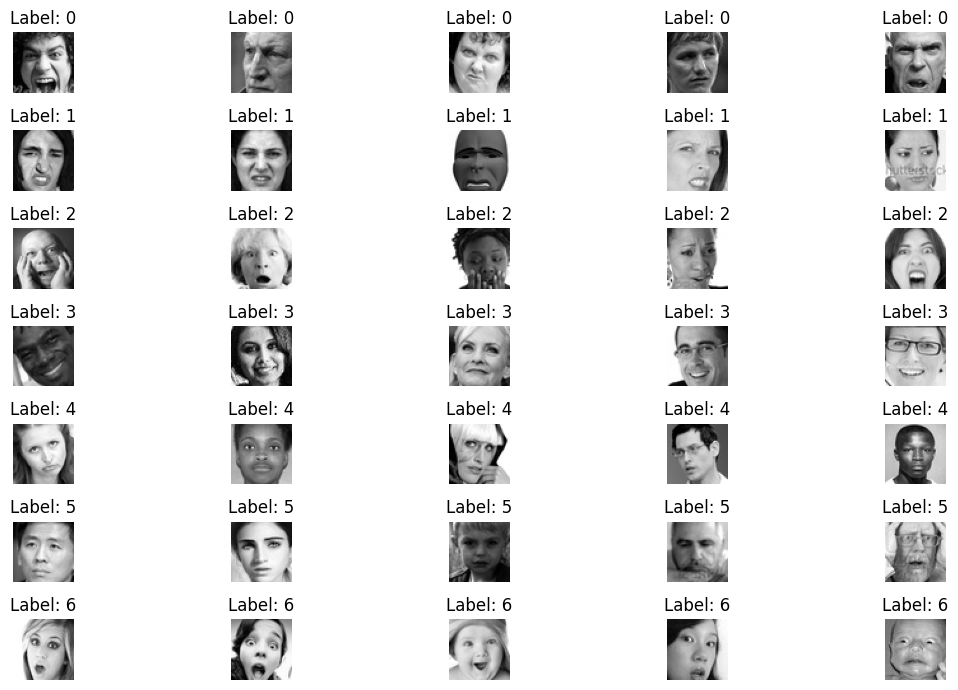

In [26]:
fig, axes = plt.subplots(ncols = 5, nrows = 7, figsize = (12, 7))

for i in range(7):
  tmp = X_train[y_train == i][45:50].squeeze()
  for j in range(5):
    axes[i, j].imshow(tmp[j], cmap = 'gray')
    axes[i, j].axis('off')
    axes[i, j].set_title(f"Label: {i}")

plt.tight_layout()
plt.show()

**Label and their emotion**
|y |emotion|
|-----|-----|
|0| angry|
|1| diggust|
|2| scare|
|3| happy|
|4| sad|
|5| supprise|
|6| neutral|


In [27]:
emotions = np.array(['angry', 'disgust', 'scare', 'happy', 'sad', 'surprise', 'neutral'])

In [28]:
# Show the count of class
emotion_count = pd.Series(y_train).value_counts().sort_index()
emotion_count

0    3216
1     344
2    3259
3    5741
4    3979
5    3853
6    2575
Name: count, dtype: int64

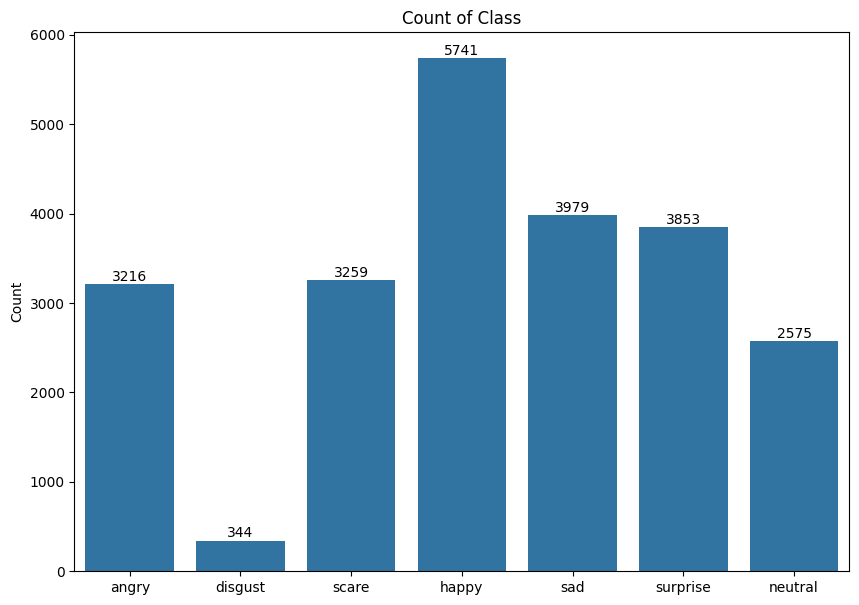

In [29]:
plt.figure(figsize = (10, 7))
ax = sns.barplot(y = emotion_count,
            x = emotions)

for i, v in enumerate(emotion_count.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

plt.xlabel("")
plt.ylabel("Count")
plt.title("Count of Class")
plt.show()

In [30]:
from sklearn.utils.class_weight import compute_class_weight

In [31]:
class_weights = compute_class_weight(class_weight = 'balanced',
                                     classes = np.unique(y_train),
                                     y = y_train.numpy())

class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

In [32]:
class_weights

tensor([1.0202, 9.5378, 1.0068, 0.5715, 0.8246, 0.8515, 1.2742],
       device='cuda:0')

## Modeling


### Data Augmentation

In [33]:
!pip install torchvision


In [34]:
# data augmentation
from torchvision.transforms import RandomHorizontalFlip, RandomRotation, RandomAffine, RandomPerspective, RandomResizedCrop, Compose

transforms = Compose([
    RandomHorizontalFlip(p = 0.5),
    RandomRotation(degrees = 15),
    RandomAffine(degrees = 15),
    RandomPerspective(),
    RandomResizedCrop(size = (48, 48))
])

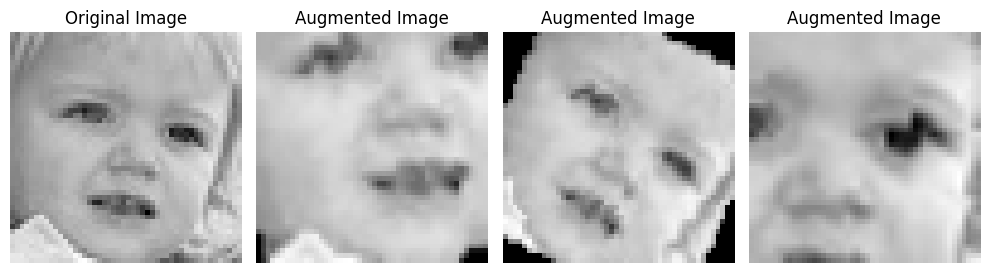

In [35]:
# show the image before and after augmentation
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 5))

axes[0].imshow(X_train[0].squeeze(), cmap = 'gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

for i in range(1, 4):
    augmented_image = transforms(X_train[0].unsqueeze(0))
    axes[i].imshow(augmented_image.squeeze(), cmap = 'gray')
    axes[i].set_title('Augmented Image')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [36]:
# using GPU
X_train = X_train.to(device)
y_train = y_train.to(device)

X_val = X_val.to(device)
y_val = y_val.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)

Then, apply this to the origin `X_train` and **concat** them together

In [37]:
# apply data augmentation
X_train_augmented = torch.stack([transforms(i) for i in X_train])

In [38]:
# merge the original and augmented data
X_train = torch.cat([X_train, X_train_augmented], dim = 0)
y_train = torch.cat([y_train, y_train], dim = 0)

In [39]:
X_train.shape

torch.Size([45934, 1, 48, 48])

In [40]:
# rescale the data
X_train = X_train / 255.
X_val = X_val / 255.
X_test = X_test / 255.

### Model Defining

In [41]:
!pip install torchsummary

  Using cached torchsummary-1.5.1-py3-none-any.whl.metadata (296 bytes)
Using cached torchsummary-1.5.1-py3-none-any.whl (2.8 kB)


In [42]:
from torch.utils.data import DataLoader, TensorDataset
from torch.nn import Module, Conv2d, Linear, MaxPool2d, ReLU, Dropout, BatchNorm2d , Flatten, Softmax
from torch.optim import Adam
from torchsummary import summary

In [43]:
# create dataloader
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size = BATCH_SIZE,)
val_dataloader = DataLoader(val_dataset, batch_size = BATCH_SIZE,)
test_dataloader = DataLoader(test_dataset, batch_size = BATCH_SIZE,)

In [44]:
class CNN(Module):
    def __init__(self, channels, num_classes):
        super().__init__()

        # Convolutional layers
        self.conv1 = Conv2d(in_channels=channels, out_channels=32, kernel_size=(5, 5), padding=2)
        self.conv2 = Conv2d(in_channels=32, out_channels=64, kernel_size=(5, 5), padding=2)
        self.conv3 = Conv2d(in_channels=64, out_channels=128, kernel_size=(5, 5), padding=2)
        self.conv4 = Conv2d(in_channels=128, out_channels=512, kernel_size=(5, 5), padding=2)
        self.conv5 = Conv2d(in_channels=512, out_channels=1024, kernel_size=(3, 3), padding=1)

        # Batch normalization
        self.batchnorm1 = BatchNorm2d(num_features=32)
        self.batchnorm2 = BatchNorm2d(num_features=64)
        self.batchnorm3 = BatchNorm2d(num_features=128)
        self.batchnorm4 = BatchNorm2d(num_features=512)
        self.batchnorm5 = BatchNorm2d(num_features=1024)

        # Other layers
        self.maxpool = MaxPool2d(kernel_size=(2, 2))
        self.relu = ReLU()
        self.dropout = Dropout(p=0.2)

        # Fully connected layers
        self.flatten = Flatten()
        self.fc1 = Linear(in_features=1024, out_features=512)
        self.fc2 = Linear(in_features=512, out_features=128)
        self.fc3 = Linear(in_features=128, out_features=num_classes)
        self.softmax = Softmax(dim=1)

    

    def forward(self, X):
        # block 1
        X = self.conv1(X)
        X = self.batchnorm1(X)
        X = self.relu(X)
        X = self.maxpool(X)

        # block 2
        X = self.conv2(X)
        X = self.batchnorm2(X)
        X = self.relu(X)
        X = self.maxpool(X)

        # block 3
        X = self.conv3(X)
        X = self.batchnorm3(X)
        X = self.relu(X)
        X = self.maxpool(X)

        # block 4
        X = self.conv4(X)
        X = self.batchnorm4(X)
        X = self.relu(X)
        X = self.maxpool(X)
        X = self.dropout(X)

        # block 5
        X = self.conv5(X)
        X = self.batchnorm5(X)
        X = self.relu(X)
        X = self.maxpool(X)
        X = self.dropout(X)

        
        # fully connected layer
        X = self.flatten(X)
        X = self.fc1(X)
        X = self.relu(X)
        X = self.dropout(X)

        X = self.fc2(X)
        X = self.relu(X)
        X = self.dropout(X)

        X = self.fc3(X)
        return X


In [45]:
model = CNN(channels = 1, num_classes = NUM_CLASSES).to(device)

In [46]:
optimizer = Adam(params = model.parameters(), lr = LEARNING_RATE)

In [47]:
# loss fn
loss_fn = torch.nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float32).to(device))

C:\Users\abdur\AppData\Local\Temp\ipykernel_30304\2094615562.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss_fn = torch.nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float32).to(device))


In [48]:
summary(model, (1, 48, 48))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 48, 48]             832
       BatchNorm2d-2           [-1, 32, 48, 48]              64
              ReLU-3           [-1, 32, 48, 48]               0
         MaxPool2d-4           [-1, 32, 24, 24]               0
            Conv2d-5           [-1, 64, 24, 24]          51,264
       BatchNorm2d-6           [-1, 64, 24, 24]             128
              ReLU-7           [-1, 64, 24, 24]               0
         MaxPool2d-8           [-1, 64, 12, 12]               0
            Conv2d-9          [-1, 128, 12, 12]         204,928
      BatchNorm2d-10          [-1, 128, 12, 12]             256
             ReLU-11          [-1, 128, 12, 12]               0
        MaxPool2d-12            [-1, 128, 6, 6]               0
           Conv2d-13            [-1, 512, 6, 6]       1,638,912
      BatchNorm2d-14            [-1, 51

### Model Training and Testing Loops Defining

In [49]:
# traning loop
def train_epoch(model, dataloader, loss_fn, optimizer):
  # turn on train phase
  model.train()
  running_loss = 0.0
  correct = 0
  total = 0

  for inputs, labels in dataloader:
    inputs, labels = inputs.to(device), labels.to(device)

    # forward pass
    outputs = model(inputs)

    # calculate loss
    loss = loss_fn(outputs, labels)

    # zero gradient
    optimizer.zero_grad()

    # backpropagation
    loss.backward()

    # update
    optimizer.step()

    # save loss and accuracy
    running_loss += loss.item()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  epoch_loss = running_loss / len(dataloader)
  epoch_acc = 100 * correct / total

  return epoch_loss, epoch_acc

In [50]:
# testing loop
def test_epoch(model, dataloader, loss_fn):
  # turn on test phase
  model.eval()
  correct = 0
  total = 0

  with torch.inference_mode():
    for inputs, labels in dataloader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model(inputs)
      _, predicted = outputs.max(1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  epoch_acc = 100 * correct / total

  return epoch_acc

### Train the model through EPOCHS

In [51]:
# best acc
best_acc = 0.0
train_loss_list = []
train_acc_list = []
val_acc_list = []

for epoch in range(EPOCHS):
  train_loss, train_acc = train_epoch(model, train_dataloader, loss_fn, optimizer)
  val_acc = test_epoch(model, val_dataloader, loss_fn)

  train_loss_list.append(train_loss)
  train_acc_list.append(train_acc)
  val_acc_list.append(val_acc)

  # save best model
  if val_acc > best_acc:
    best_acc = val_acc
    torch.save(model.state_dict(), 'best_model.pth')

  print(f"Epoch [{epoch+1}/{EPOCHS}]")
  print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
  print(f"Val Acc: {val_acc:.2f}%")
  print('-'*50)

Epoch [1/100]
Train Loss: 1.8318 | Train Acc: 27.46%
Val Acc: 40.33%
--------------------------------------------------
Epoch [2/100]
Train Loss: 1.6561 | Train Acc: 35.72%
Val Acc: 45.63%
--------------------------------------------------
Epoch [3/100]
Train Loss: 1.5362 | Train Acc: 39.65%
Val Acc: 47.77%
--------------------------------------------------
Epoch [4/100]
Train Loss: 1.4304 | Train Acc: 42.97%
Val Acc: 46.24%
--------------------------------------------------
Epoch [5/100]
Train Loss: 1.3232 | Train Acc: 46.56%
Val Acc: 51.32%
--------------------------------------------------
Epoch [6/100]
Train Loss: 1.2275 | Train Acc: 49.16%
Val Acc: 50.70%
--------------------------------------------------
Epoch [7/100]
Train Loss: 1.1504 | Train Acc: 51.89%
Val Acc: 52.96%
--------------------------------------------------
Epoch [8/100]
Train Loss: 1.0765 | Train Acc: 55.00%
Val Acc: 53.08%
--------------------------------------------------
Epoch [9/100]
Train Loss: 1.0128 | Train

Plot the training curve and accuracy curve to see what happened

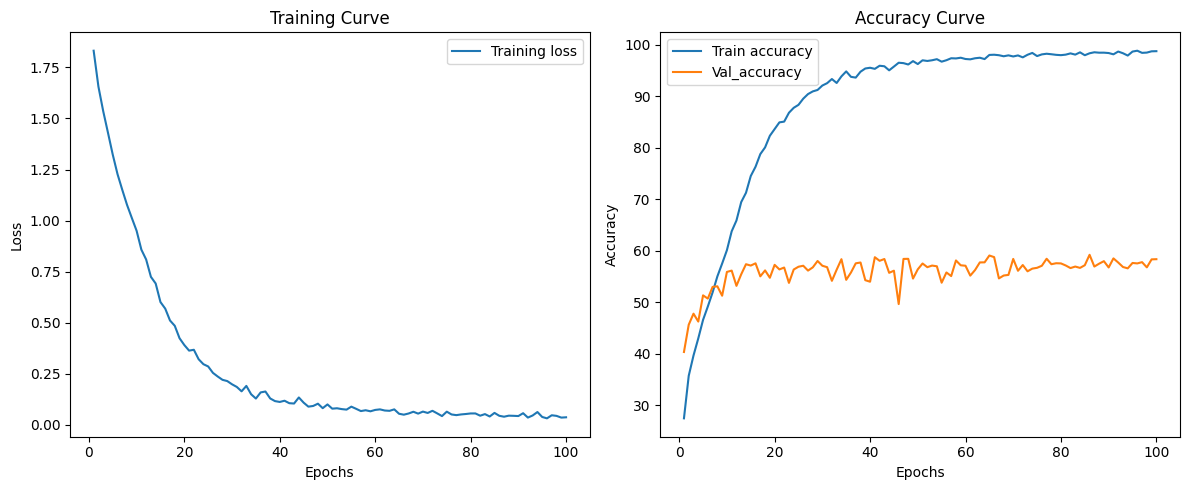

In [54]:
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (12, 5))

# Plot training curve
sns.lineplot(x = range(1, EPOCHS+1), y = train_loss_list, ax = axes[0], label = "Training loss")
axes[0].set_title("Training Curve")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")

# Plot accuracy curve
sns.lineplot(x = range(1, EPOCHS+1), y = train_acc_list, ax = axes[1], label = "Train accuracy")
sns.lineplot(x = range(1, EPOCHS+1), y = val_acc_list, ax = axes[1], label = "Val_accuracy")
axes[1].set_title("Accuracy Curve")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")

plt.tight_layout()
plt.show()

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

In [56]:
y_pred = []
y_true = []

model.load_state_dict(torch.load('./best_model.pth'))
model.eval()

with torch.inference_mode():
  for inputs, labels in test_dataloader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, predicted = outputs.max(1)
    y_pred.extend(predicted.cpu().numpy())
    y_true.extend(labels.cpu().numpy())

  print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.46      0.49       958
           1       0.68      0.44      0.54       111
           2       0.55      0.31      0.40      1024
           3       0.80      0.76      0.78      1774
           4       0.50      0.59      0.54      1233
           5       0.43      0.53      0.48      1247
           6       0.66      0.80      0.72       831

    accuracy                           0.59      7178
   macro avg       0.59      0.56      0.56      7178
weighted avg       0.59      0.59      0.58      7178



In [57]:
print("F1 score macro:", f1_score(y_true, y_pred, average = 'macro'))

F1 score macro: 0.5639004750993128


In [58]:
print("Accuracy:", accuracy_score(y_true, y_pred))

Accuracy: 0.58790749512399


In [59]:
f1_scores = f1_score(y_true, y_pred, average=None)

f1_data = pd.DataFrame({
    'Emotion': emotions,
    'F1-Score': f1_scores
})

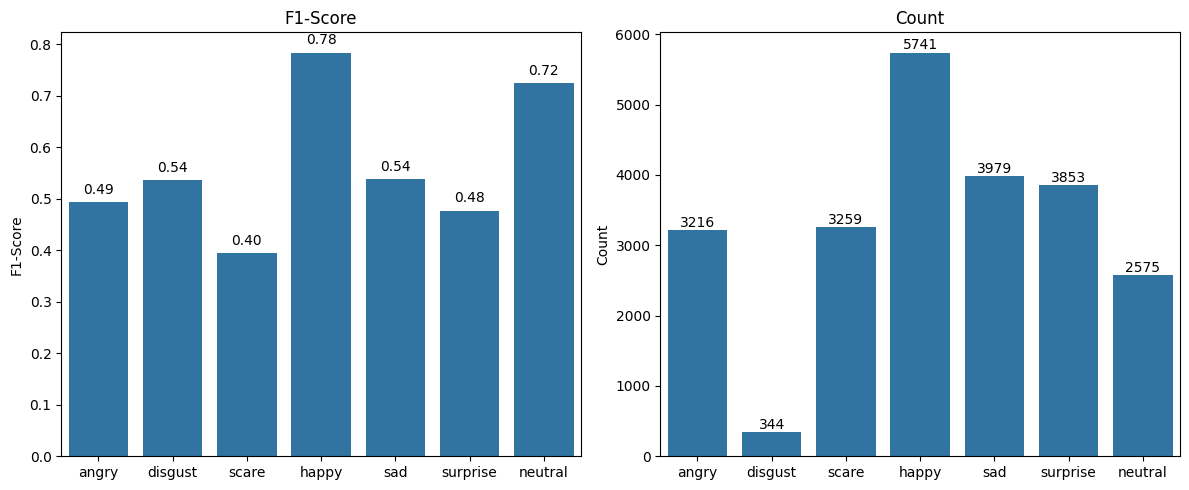

In [60]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

#----F1 SCORE PLOT-------
sns.barplot(x='Emotion', y='F1-Score', data=f1_data, ax=axes[0])
axes[0].set_title("F1-Score")
axes[0].set_xlabel("")
axes[0].set_ylabel("F1-Score")

for i, bar in enumerate(axes[0].containers[0]):  # containers[0] contain bars
    value = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, value + 0.01,  # label position
                 f"{value:.2f}", ha='center', va='bottom', fontsize=10)


#----COUNTPLOT-------
sns.barplot(y=emotion_count, x=emotions, ax=axes[1])
axes[1].set_title("Count")
axes[1].set_xlabel("")
axes[1].set_ylabel("Count")

for i, bar in enumerate(axes[1].containers[0]):
    value = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, value + 1,
                 f"{int(value)}", ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()

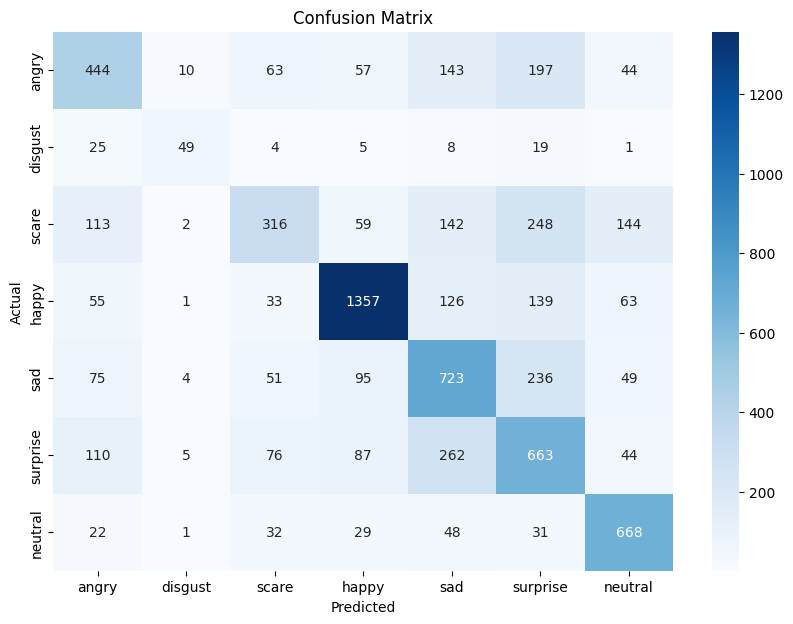

In [61]:
# confusion matrix heatmap
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [62]:
import torch

# Save the entire model
torch.save(model, 'emotion_model_bisa.pth')
print("Model saved to emotion_model_bisa.pth")

# OR (Recommended) Save only the model's state_dict
torch.save(model.state_dict(), 'emotion_model_weights.pth')
print("Model weights saved to emotion_model_weights.pth")


Model saved to emotion_model_bisa.pth
Model weights saved to emotion_model_weights.pth


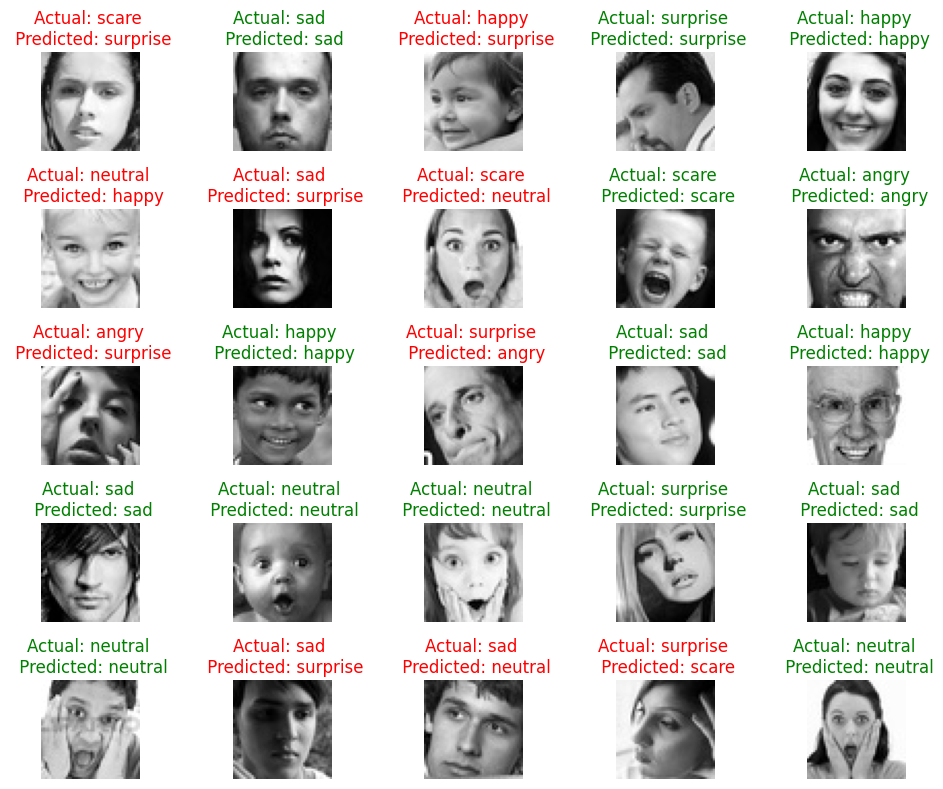

In [63]:
# show 25 random test image and model predictions of them
fig, axes = plt.subplots(ncols = 5, nrows = 5, figsize = (10, 8))
axes = axes.flatten()

for i in range(25):
  idx = np.random.randint(0, len(X_test))
  image = X_test[idx]
  label = y_test[idx]
  pred = y_pred[idx]

  if label == pred:
    title_color = 'green'
  else:
    title_color = 'red'
  
  axes[i].imshow(image.squeeze().cpu().numpy(), cmap = 'gray')
  axes[i].set_title(f"Actual: {emotions[label]} \n Predicted: {emotions[pred]}", color = title_color)
  axes[i].axis('off')

plt.tight_layout()
plt.show()

In [64]:
import cv2
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import transforms

# Define the model architecture (Fixed)
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = torch.nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = torch.nn.MaxPool2d(2, 2)  # Added pooling to downsample
        self.fc1 = torch.nn.Linear(64 * 56 * 56, 128)  # Adjusted input size after pooling
        self.fc2 = torch.nn.Linear(128, 7)  # 7 emotion classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the trained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
model.load_state_dict(torch.load('emotion_model_bisa.pth', map_location=device))
model.eval()

# Emotion labels and colors
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
emotion_colors = {
    'angry': (0, 0, 255),       # Red
    'disgust': (0, 255, 0),      # Green
    'fear': (255, 0, 255),       # Purple
    'happy': (0, 255, 255),      # Yellow
    'neutral': (128, 128, 128),  # Gray
    'sad': (255, 0, 0),          # Blue
    'surprise': (0, 165, 255)    # Orange
}

# Confidence threshold
CONFIDENCE_THRESHOLD = 0.2

# Open the webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Load face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define preprocessing transformations
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),  # Resize to match model input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame.")
        break

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=6, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract and preprocess the face
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (224, 224))  # Resize to 224x224
        face = np.expand_dims(face, axis=0)  # Add single-channel dimension
        face_tensor = torch.from_numpy(face).float().unsqueeze(0).unsqueeze(0).to(device)  # Corrected tensor format

        # Predict emotion
        with torch.no_grad():
            output = model(face_tensor)
            probabilities = F.softmax(output, dim=1).cpu().numpy()[0]

        max_confidence = np.max(probabilities)
        emotion_idx = np.argmax(probabilities)

        # If confidence is below threshold, display "Uncertain"
        if max_confidence < CONFIDENCE_THRESHOLD:
            emotion = "Uncertain"
            color = (128, 128, 128)  # Gray
            label = "Uncertain"
        else:
            emotion = emotion_labels[emotion_idx]
            color = emotion_colors[emotion]
            label = f"{emotion} ({max_confidence:.2f})"

        # Draw rectangle and label
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Display the frame
    cv2.imshow('Real-Time Emotion Detection', frame)

    # Exit on 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()


UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL __main__.CNN was not an allowed global by default. Please use `torch.serialization.add_safe_globals([CNN])` or the `torch.serialization.safe_globals([CNN])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.